<h1>Zadanie 1</h1>

Importowanie niezbędnych bibliotek

In [100]:
%matplotlib ipympl
from matplotlib.widgets import SpanSelector, CheckButtons
import numpy as np
import matplotlib.pyplot as plt

Funkcja readFile odpowiedzialna jest za wczytywanie danych z pliku

In [101]:
def readFile(filename):
    global content
    try:
        with open(filename, 'r') as file:
            return file.read()

    except FileNotFoundError:
        print(f"Plik {filename} nie został znaleziony.")
    except Exception as e:
        print(f"Wystąpił błąd podczas wczytywania pliku {filename}: {e}")


Funkcja callback odpowiada za zarządzanie zdarzeniem po naciśnięcia przycisku (po wybraniu wykresu do wyświetlenia)

In [102]:
def callback(label):
    ln = lines_by_label[label]
    ln.set_visible(not ln.get_visible())
    ln.figure.canvas.draw_idle()

    index = lines.index(ln)
    lines2[index].set_visible(not lines2[index].get_visible())
    lines2[index].figure.canvas.draw_idle()

    onselect(xRange[0], xRange[1])

Funkcja onselect odpowiada za zarządzanie zdarzeniem po zaznaczeniu obszaru na wykresie

In [103]:
def onselect(xmin, xmax):
    global xRange
    xRange = xmin, xmax
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x) - 1, indmax)

    region_x = x[indmin:indmax]

    if len(region_x) >= 2:
        minY = []
        maxY = []
        for i in range(12):
            region_y = y[i][indmin:indmax]
            lines2[i].set_data(region_x, region_y)
            if lines[i].get_visible():
                maxY.append(max(region_y))
                minY.append(min(region_y))

        if len(minY) != 0:
            axs[1].set_ylim(min(minY), max(maxY))
        axs[1].set_xlim(region_x[0], region_x[-1])
        fig.canvas.draw_idle()

Wczytujemy plik

In [104]:
filename = 'ekg1'
ekg = readFile(filename)

Zgodnie ze znanymi specyfikacjami pliku porządkujemy dane i przypisujemy je do odpowiednich osi w układzie współżędnych

In [105]:
ekg = np.array([list(map(int, line.split())) for line in ekg.split("\n")])
y = ekg.T
x = np.arange(1, len(ekg) + 1) * 0.001

Ustawianie parametrów pierwszego wykresu. Zmienna lines przechowuje wykresy kolejnych sygnałów ekg, natomiast zmienna colors, kolory w celu estetyczniejszej prezentacji danych.


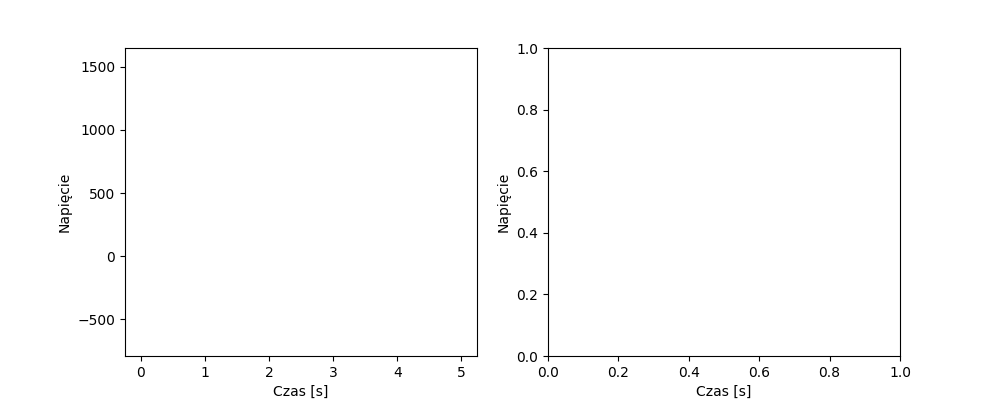

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_xlabel('Czas [s]')
axs[0].set_ylabel('Napięcie')
axs[1].set_xlabel('Czas [s]')
axs[1].set_ylabel('Napięcie')
lines=[]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']
for i in range(12):
    j, = axs[0].plot(x, y[i], visible=False, lw=0.5, color=colors[i], label="ekg "+str(i + 1))
    lines.append(j)

lines_by_label = {l.get_label(): l for l in lines}

Określanie parametrów przycisków wyboru

In [120]:
rax = axs[1].inset_axes([1.0, 0.0, 0.19, 0.8])
check = CheckButtons(
    ax=rax,
    labels=lines_by_label.keys(),
    actives=[l.get_visible() for l in lines_by_label.values()],
    label_props={'color': colors},
    frame_props={'edgecolor': colors},
    check_props={'facecolor': colors},
)

check.on_clicked(callback)

0

Definiowanie drugiego wykresu pomocniczego orzaz zmiennej zapobiegającej później błędom przy wybieraniu kolejnych wykresów

In [121]:

lines2 = []

for _ in range(12):
    line, = axs[1].plot([], [])
    line.set_visible(False)
    lines2.append(line)

xRange = [0,0]

Określanie parametrów pola umożliwiającego zaznaczenie fragmentu wykresu i prezentacja wykresów

In [122]:
span = SpanSelector(
    axs[0],
    onselect,
    "horizontal",
    useblit=True,
    props=dict(alpha=0.5, facecolor="tab:blue"),
    interactive=True,
    drag_from_anywhere=True
)


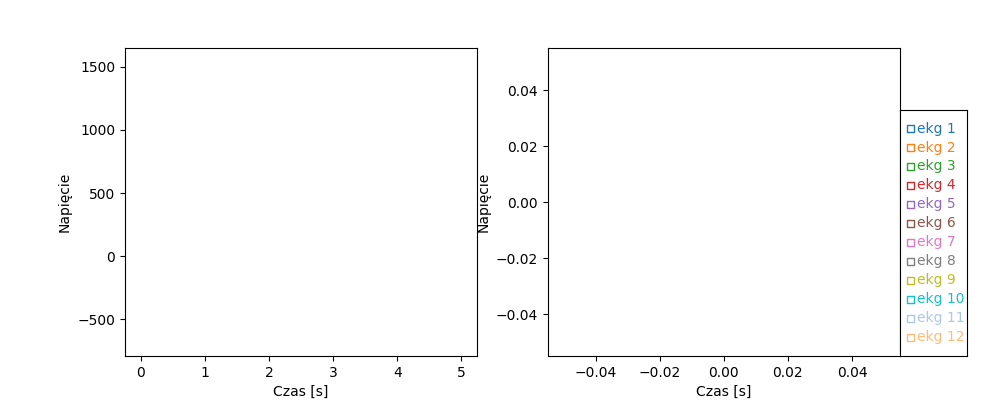

In [123]:
plt.show()